<a href="https://colab.research.google.com/github/narrasriram/frontend-basics/blob/master/DS/ModelsEmotion_Stimulus_NaiveBayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# -*- coding: utf-8 -*-

# Author: Sriram Narra
# Course: CS 842
# Date: Apr 15, 2021
# Project Name: Emotion Recognition using Fine-tuned Models(ERFM)
# Description: This notebook builds a Navive Bayes Model on Emotion 
#              Stimulus Dataset and checks the performance of the 
#              model with various model evaluation metrics
# --------------------------------------------------------------------------------

Install Required Dependencies

In [1]:
from pandas import DataFrame
import textblob
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import MultinomialNB



import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mount the Google Drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Read the Dataset into a List

In [3]:
with open('/content/drive/MyDrive/Data Science Project/Datasets/Emotion_Stimulus/No_Cause.txt') as f:
    conversations = f.readlines()

In [4]:
conversations[-1]

'<shame>GRAHAM TAYLOR will defy the fury of a humiliated nation and risk his entire reputation on an England miracle in the next five months . <\\shame>\n'

Data Transformation into Dictionary with Sentences as Key and Values as Emotions

In [5]:
import re
from bs4 import BeautifulSoup

data = {}

for line in conversations:
    result = re.search(r"<[a-zA-z]+>", line)
    emotion = result.group(0)
    emotion  = emotion[1:(len(emotion)-1)]
    #print(emotion)

    soup = BeautifulSoup(line)
    x = soup.findAll(emotion)
    #print(x)

    txt = ''.join(x[0].findAll(text=True)).strip()

    data[txt] = emotion
print(data)



{'This did the trick : the boys now have a more distant friendship and David is much happier .': 'happy', 'When Anna left Inspector Aziz , she was much happier .': 'happy', "And though , as Lachlan had planned , they had expected the attack in the morning , they were quite happy when their lookouts reported the Macleans ' approach in the early evening .": 'happy', "Honestly , I 'm really happy for you !": 'happy', 'Lesley was totally happy about it .': 'happy', 'For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition .': 'happy', 'She became happier , more settled .': 'happy', 'During the day her mother seemed happy at times , baking , trying out fresh recipes , or changing yet again the curtains , or crocheting new chair-backs .': 'happy', 'They seemed happy about my victory in Germany and most of them expected me to win more races last year . "': 'happy', 'Never before had Bodmin seen so many faces 

Data Transformation into Dataframe

In [6]:
data_frame = DataFrame(data.items(), columns=['Sentence', 'Emotion'])

In [7]:
data_frame.head()

,Sentence,Emotion
0,This did the trick : the boys now have a more ...,happy
1,"When Anna left Inspector Aziz , she was much h...",happy
2,"And though , as Lachlan had planned , they had...",happy
3,"Honestly , I 'm really happy for you !",happy
4,Lesley was totally happy about it .,happy


Subjectivity Score Retrieval Function Declaration

In [8]:
def getScore(data):
  return TextBlob(data).sentiment.subjectivity

In [9]:
data_frame["Subj_Score"] = data_frame["Sentence"].apply(getScore)

In [10]:
data_frame.tail()

,Sentence,Emotion,Subj_Score
1584,He gets real humiliated and has to leave .,shame,0.3000
1585,They aimed for higher status jobs and felt hum...,shame,0.5000
1586,He cursed his lack of self-control ; he knew t...,shame,0.2000
1587,Sometimes I've thought I 'll never forget what...,shame,0.5750
1588,GRAHAM TAYLOR will defy the fury of a humiliat...,shame,0.3125


In [11]:
print(data_frame["Emotion"].value_counts())

sad         467
anger       283
fear        278
happy       268
surprise    160
shame        76
disgust      57
Name: Emotion, dtype: int64


Balacnced/Imbalanced Data Analysis

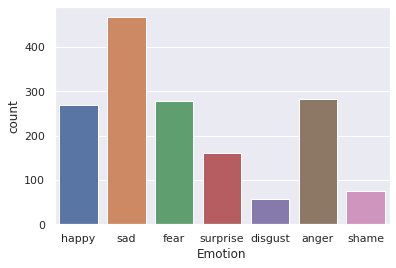

In [12]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Emotion", data=data_frame)

Missing Values Analysis

In [13]:
data_frame.isnull().values.any()

False

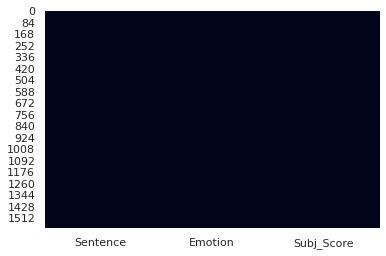

In [14]:
sns.heatmap(data_frame.isnull(), cbar=False)

In [15]:
len(data_frame)

1589

Data Transforming

In [16]:
req_sentences_list = []
for i in range(0, len(data_frame)):
    substituted_sentence = re.sub('[^a-zA-Z]', ' ', data_frame['Sentence'][i])
    # Take the lower case alphabets of every sentence
    lower_cased_sentence = substituted_sentence.lower()

    # Split every word in the sentence
    splitted_sentence = lower_cased_sentence.split()

    # Stem every word to its root word
    ps = PorterStemmer()
    stemmed_sentence = [ps.stem(each_word) for each_word in splitted_sentence if not each_word in set(stopwords.words('english'))]

    # Join the divided words
    cleaned_sentence = ' '.join(stemmed_sentence)

    # Append the cleaned sentence to the list
    req_sentences_list.append(cleaned_sentence)

Label Encoding of Emotion Labels

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Emotion'] = le.fit_transform(data_frame['Emotion'])

Creation of Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
feature_count_calc = CountVectorizer(max_features = 1589)
X = feature_count_calc.fit_transform(req_sentences_list).toarray()
y = data_frame.iloc[:, 1].values

Scale the features onto a single scale

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify=y)

Fitting Naive Bayes to the Training set

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

In [ ]:
print(le.inverse_transform(y_pred))

['fear' 'happy' 'fear' 'sad' 'anger' 'sad' 'sad' 'sad' 'fear' 'anger'
 'anger' 'anger' 'fear' 'sad' 'sad' 'happy' 'disgust' 'surprise' 'fear'
 'happy' 'anger' 'sad' 'sad' 'fear' 'anger' 'fear' 'happy' 'anger' 'sad'
 'anger' 'fear' 'disgust' 'sad' 'happy' 'disgust' 'happy' 'disgust'
 'anger' 'shame' 'fear' 'surprise' 'fear' 'sad' 'sad' 'happy' 'fear'
 'happy' 'shame' 'sad' 'happy' 'surprise' 'fear' 'fear' 'sad' 'happy'
 'sad' 'fear' 'happy' 'sad' 'fear' 'anger' 'sad' 'surprise' 'fear'
 'surprise' 'sad' 'happy' 'anger' 'fear' 'sad' 'fear' 'sad' 'sad' 'sad'
 'shame' 'happy' 'sad' 'sad' 'sad' 'disgust' 'anger' 'happy' 'fear' 'sad'
 'happy' 'sad' 'anger' 'surprise' 'happy' 'fear' 'sad' 'anger' 'happy'
 'anger' 'happy' 'sad' 'anger' 'fear' 'anger' 'fear' 'sad' 'sad' 'fear'
 'anger' 'happy' 'sad' 'sad' 'sad' 'happy' 'surprise' 'sad' 'sad' 'happy'
 'happy' 'sad' 'happy' 'sad' 'sad' 'fear' 'fear' 'anger' 'surprise'
 'happy' 'fear' 'anger' 'sad' 'sad' 'fear' 'fear' 'sad' 'sad' 'anger'
 'happy' '

Weighted Accuracy Score

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6963978220466215

Weighted Precision, Recall, F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.7961664106034241, 0.7924528301886793, 0.787206998426298, None)

Stylized Confusion Matrix.

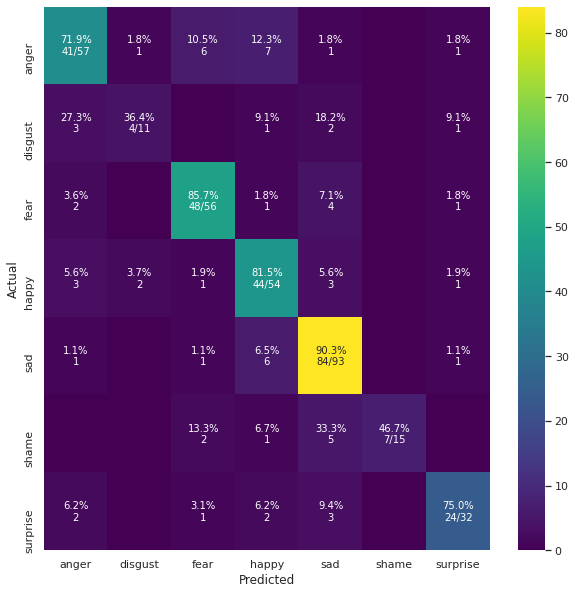

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap="viridis",  annot=annot, fmt='', ax=ax)
    
plot_cm(le.inverse_transform(y_test), le.inverse_transform(y_pred))

5-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
metric_scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Average Score:",metric_scores.mean())
print("Average Standard Deviation:",metric_scores.std())

Average Score: 0.8135433070866143
Average Standard Deviation: 0.02140458166636836


In [ ]:
metric_scores

array([0.8       , 0.83858268, 0.83070866, 0.77952756, 0.81889764])

ROC Curves

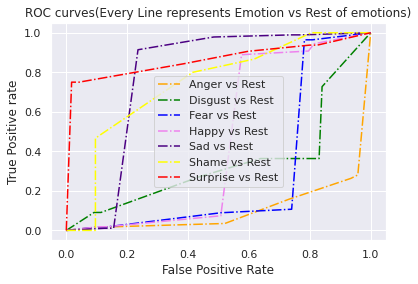

In [ ]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate = {}
true_positive_rate = {}
threshold ={}


number_of_classes = 7

for i in range(number_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = roc_curve(y_test, y_pred, pos_label=i)
       
plt.plot(false_positive_rate[0], true_positive_rate[0], linestyle='-.',color='orange', label='Anger vs Rest')
plt.plot(false_positive_rate[1], true_positive_rate[1], linestyle='-.',color='green', label='Disgust vs Rest')
plt.plot(false_positive_rate[2], true_positive_rate[2], linestyle='-.',color='blue', label='Fear vs Rest')
plt.plot(false_positive_rate[3], true_positive_rate[3], linestyle='-.',color='violet', label='Happy vs Rest')
plt.plot(false_positive_rate[4], true_positive_rate[4], linestyle='-.',color='indigo', label='Sad vs Rest')
plt.plot(false_positive_rate[5], true_positive_rate[5], linestyle='-.',color='yellow', label='Shame vs Rest')
plt.plot(false_positive_rate[6], true_positive_rate[6], linestyle='-.',color='red', label='Surprise vs Rest')
plt.title('ROC curves(Every Line represents Emotion vs Rest of emotions)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=350); 

ROC AUC Score

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)

y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)

In [ ]:
# For Multiclass case
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred, multi_class='ovo')

0.8296584360712266

In [ ]:
list(le.inverse_transform([0,1,2,3,4,5,6]))

['anger', 'disgust', 'fear', 'happy', 'sad', 'shame', 'surprise']

References:

1. Stylized Confusion Matrix - https://www.kaggle.com/agungor2/various-confusion-matrix-plots

2.  Edward Loper and Steven Bird. “NLTK: The Natural Language Toolkit”. In:CoRRcs.CL/0205028(2002).url:http://dblp.uni- trier.de/db/journals/corr/corr0205.html#cs- CL-0205028

3. Guido Van Rossum and Fred L. Drake.Python 3 Reference Manual. Scotts Valley, CA: CreateS-pace, 2009.isbn: 1441412697.

4.  F. Pedregosa et al. “Scikit-learn: Machine Learning in Python”. In:Journal of Machine LearningResearch12 (2011), pp. 2825–2830.

5. Conversion of Input into Word Features - https://github.com/narrasriram/data_science/blob/master/machine_learning/natural%20language%20processing/sentiment%20classification/natural_language_processing.py